In [30]:
import pandas as pd
import yfinance as yf
import numpy as np
import matplotlib.pyplot as plt

In [31]:
data = yf.download("SPY AAPL", start='2020-01-01', end='2021-09-30')

[*********************100%***********************]  2 of 2 completed


In [32]:
df = data.Close.copy()

<AxesSubplot:xlabel='SPY', ylabel='AAPL'>

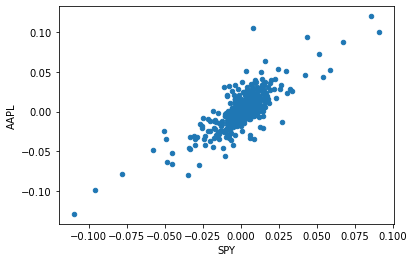

In [33]:
df.pct_change(1).plot.scatter(x="SPY", y="AAPL")

In [34]:
df_ret = df.pct_change()

In [35]:
df_ret

,AAPL,SPY
Date,,
2019-12-31,NaN,NaN
2020-01-02,0.022816,0.009352
2020-01-03,-0.009722,-0.007572
2020-01-06,0.007968,0.003815
2020-01-07,-0.004703,-0.002812
...,...,...
2021-09-23,0.006719,0.012150
2021-09-24,0.000613,0.001647
2021-09-27,-0.010550,-0.002861


In [36]:
X = df_ret.AAPL
y = df_ret.SPY

In [37]:
X.dropna(inplace=True)
y.dropna(inplace=True)

In [38]:
m, c = np.polyfit(X, y, 1)

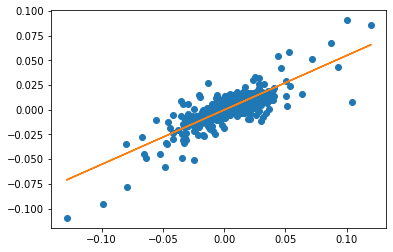

In [39]:
plt.plot(X, y, 'o')
plt.plot(X, m*X + c)

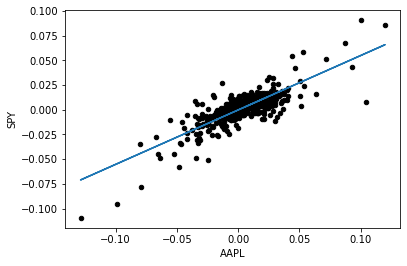

In [40]:
df_ret.plot.scatter(x="AAPL", y="SPY", c='k')
plt.plot(X, m*X + c)

In [41]:
df_ret[(df_ret.SPY < -0.075)]

,AAPL,SPY
Date,,
2020-03-09,-0.079092,-0.078094
2020-03-12,-0.098755,-0.095677
2020-03-16,-0.128647,-0.109424


In [42]:
df_ret[~(df_ret.SPY < -0.075)]

,AAPL,SPY
Date,,
2019-12-31,NaN,NaN
2020-01-02,0.022816,0.009352
2020-01-03,-0.009722,-0.007572
2020-01-06,0.007968,0.003815
2020-01-07,-0.004703,-0.002812
...,...,...
2021-09-23,0.006719,0.012150
2021-09-24,0.000613,0.001647
2021-09-27,-0.010550,-0.002861


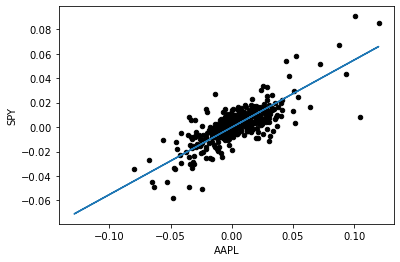

In [43]:
df_ret = df_ret[~(df_ret.SPY < -0.075)]
m, c = np.polyfit(X, y, 1)
df_ret.plot.scatter(x='AAPL', y='SPY', c='k')
plt.plot(X, m*X + c)

##### Noted - When the economic crisis, correlation will converge close to one.

In [44]:
df_ret.loc[(df_ret['AAPL'] > 0.1) & (df_ret['SPY'] < 0.02)]

,AAPL,SPY
Date,,
2020-07-31,0.104689,0.007902


In [45]:
df_ret.loc[df_ret.index != '2020-07-31']

,AAPL,SPY
Date,,
2019-12-31,NaN,NaN
2020-01-02,0.022816,0.009352
2020-01-03,-0.009722,-0.007572
2020-01-06,0.007968,0.003815
2020-01-07,-0.004703,-0.002812
...,...,...
2021-09-23,0.006719,0.012150
2021-09-24,0.000613,0.001647
2021-09-27,-0.010550,-0.002861


In [46]:
test = df_ret.loc[~((df_ret['AAPL'] > 0.1) & (df_ret['SPY'] < 0.02))]

In [47]:
test

,AAPL,SPY
Date,,
2019-12-31,NaN,NaN
2020-01-02,0.022816,0.009352
2020-01-03,-0.009722,-0.007572
2020-01-06,0.007968,0.003815
2020-01-07,-0.004703,-0.002812
...,...,...
2021-09-23,0.006719,0.012150
2021-09-24,0.000613,0.001647
2021-09-27,-0.010550,-0.002861


In [48]:
X = test.AAPL.dropna()
y = test.SPY.dropna()
m,c = np.polyfit(X, y, 1)

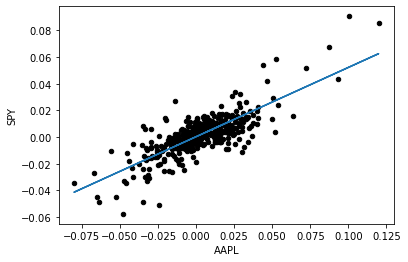

In [49]:
test.plot.scatter(x='AAPL', y='SPY', c='k')
plt.plot(X, m*X + c)

In [51]:
df_ret[(df_ret.SPY > 0.06)]

,AAPL,SPY
Date,,
2020-03-13,0.119808,0.085486
2020-03-24,0.100325,0.090603
2020-04-06,0.087237,0.067166
